In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [100]:
DATA_FOLDER = 'data/'
assay = pd.read_csv(f'{DATA_FOLDER}BS_assay.csv')
block_model = pd.read_csv(f'{DATA_FOLDER}BS_block_model.csv')
collar = pd.read_csv(f'{DATA_FOLDER}BS_collar.csv')
old_lith = pd.read_csv(f'{DATA_FOLDER}BS_old_lith.csv')
relog_geo = pd.read_csv(f'{DATA_FOLDER}BS_relog_geology.csv')
survey = pd.read_csv(f'{DATA_FOLDER}BS_survey.csv')

In [101]:
assay.describe()

,SAMPFROM,SAMPTO,AG_PPM_OLDISKUT,AS_PPM_OLDISKUT,BA_PPM_OLDISKUT,BI_PPM_OLDISKUT,CD_PPM_OLDISKUT,CO_PPM_OLDISKUT,CR_PPM_OLDISKUT,CU_PCT_OLDISKUT,FE_PCT_OLDISKUT,K_PCT_OLDISKUT,MO_PCT_OLDISKUT,NA_PCT_OLDISKUT,PB_PCT_OLDISKUT,S_PCT_OLDISKUT,SB_PPM_OLDISKUT,Veins
count,10525.000000,10525.000000,10328.00000,4038.000000,2820.000000,4038.000000,4038.000000,4038.000000,4038.000000,10306.000000,4038.000000,4038.000000,9034.000000,4038.000000,5234.000000,3571.000000,2820.000000,0.0
mean,155.971971,158.256211,10.56126,307.575656,495.053191,10.895740,23.471867,21.661961,65.699356,0.089409,6.098801,1.798683,0.003078,0.521446,0.064750,2.461747,5.392021,NaN
std,124.255053,124.278642,533.71958,1660.363993,503.072345,47.347628,78.863799,40.512976,67.533895,0.269481,3.428176,1.114614,0.095341,1.017273,0.266732,2.673068,9.010614,NaN
min,0.000000,0.460000,-9.00000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,NaN
25%,59.660000,61.900000,0.70000,31.000000,112.000000,1.000000,0.600000,10.000000,21.000000,0.012000,3.980000,0.950000,0.000000,0.020000,0.000000,0.870000,2.500000,NaN
50%,124.600000,126.760000,1.50000,52.000000,217.500000,2.500000,4.000000,15.000000,42.000000,0.034000,5.260000,1.520000,0.001000,0.030000,0.000000,1.640000,2.500000,NaN
75%,222.000000,224.300000,3.43000,130.750000,850.000000,6.000000,14.475000,21.000000,84.000000,0.104000,7.300000,2.460000,0.004000,0.190000,0.000000,3.035000,5.000000,NaN
max,693.000000,696.000000,54196.00000,58800.000000,3720.000000,1516.000000,2000.000000,1070.000000,622.000000,16.300000,50.000000,6.430000,0.400000,4.580000,4.500000,36.700000,171.000000,NaN


In [102]:
len(assay.HOLEID.unique())

194

In [103]:
print(len(assay), len(block_model), len(collar), len(old_lith), len(relog_geo), len(survey))

10527 404919 234 40845 221 937


In [104]:
assay.head(1)

,HOLEID,SAMPFROM,SAMPTO,AG_PPM_OLDISKUT,AS_PPM_OLDISKUT,AU_PPM_OLDISKUT,BA_PPM_OLDISKUT,BI_PPM_OLDISKUT,CD_PPM_OLDISKUT,CO_PPM_OLDISKUT,...,K_PCT_OLDISKUT,MO_PCT_OLDISKUT,NA_PCT_OLDISKUT,PB_PCT_OLDISKUT,S_PCT_OLDISKUT,SB_PPM_OLDISKUT,Comment,Veins,Snip_Veins,Snip_veins_sorted
0,1198,3.0,8.0,2.6,NaN,0.375,NaN,NaN,NaN,NaN,...,NaN,0.006,NaN,NaN,NaN,NaN,NaN,NaN,High,High


In [105]:
print(assay.isna().any())

HOLEID               False
SAMPFROM              True
SAMPTO                True
AG_PPM_OLDISKUT       True
AS_PPM_OLDISKUT       True
AU_PPM_OLDISKUT      False
BA_PPM_OLDISKUT       True
BI_PPM_OLDISKUT       True
CD_PPM_OLDISKUT       True
CO_PPM_OLDISKUT       True
CR_PPM_OLDISKUT       True
CU_PCT_OLDISKUT       True
FE_PCT_OLDISKUT       True
K_PCT_OLDISKUT        True
MO_PCT_OLDISKUT       True
NA_PCT_OLDISKUT       True
PB_PCT_OLDISKUT       True
S_PCT_OLDISKUT        True
SB_PPM_OLDISKUT       True
Comment               True
Veins                 True
Snip_Veins            True
Snip_veins_sorted     True
dtype: bool


In [106]:
assay[assay.SAMPFROM.isna()]

,HOLEID,SAMPFROM,SAMPTO,AG_PPM_OLDISKUT,AS_PPM_OLDISKUT,AU_PPM_OLDISKUT,BA_PPM_OLDISKUT,BI_PPM_OLDISKUT,CD_PPM_OLDISKUT,CO_PPM_OLDISKUT,...,K_PCT_OLDISKUT,MO_PCT_OLDISKUT,NA_PCT_OLDISKUT,PB_PCT_OLDISKUT,S_PCT_OLDISKUT,SB_PPM_OLDISKUT,Comment,Veins,Snip_Veins,Snip_veins_sorted
10500,UG21-212,NaN,NaN,NaN,NaN,NSA,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Aug 2021 drilling,NaN,NaN,NaN
10526,UG21-217,NaN,NaN,NaN,NaN,NSA,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Aug 2021 drilling,NaN,NaN,NaN


In [107]:
assay.columns

Index(['HOLEID', 'SAMPFROM', 'SAMPTO', 'AG_PPM_OLDISKUT', 'AS_PPM_OLDISKUT',
       'AU_PPM_OLDISKUT', 'BA_PPM_OLDISKUT', 'BI_PPM_OLDISKUT',
       'CD_PPM_OLDISKUT', 'CO_PPM_OLDISKUT', 'CR_PPM_OLDISKUT',
       'CU_PCT_OLDISKUT', 'FE_PCT_OLDISKUT', 'K_PCT_OLDISKUT',
       'MO_PCT_OLDISKUT', 'NA_PCT_OLDISKUT', 'PB_PCT_OLDISKUT',
       'S_PCT_OLDISKUT', 'SB_PPM_OLDISKUT', 'Comment', 'Veins', 'Snip_Veins',
       'Snip_veins_sorted'],
      dtype='object')

In [108]:
clean_assay = assay[pd.to_numeric(assay['AU_PPM_OLDISKUT'], errors='coerce').notnull()]

clean_assay.AU_PPM_OLDISKUT = clean_assay.AU_PPM_OLDISKUT.astype(float)
clean_assay.dtypes

/var/folders/4h/m6_qv78d1ll6g0_5dn81rvh80000gp/T/ipykernel_23464/255133603.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_assay.AU_PPM_OLDISKUT = clean_assay.AU_PPM_OLDISKUT.astype(float)


HOLEID                object
SAMPFROM             float64
SAMPTO               float64
AG_PPM_OLDISKUT      float64
AS_PPM_OLDISKUT      float64
AU_PPM_OLDISKUT      float64
BA_PPM_OLDISKUT      float64
BI_PPM_OLDISKUT      float64
CD_PPM_OLDISKUT      float64
CO_PPM_OLDISKUT      float64
CR_PPM_OLDISKUT      float64
CU_PCT_OLDISKUT      float64
FE_PCT_OLDISKUT      float64
K_PCT_OLDISKUT       float64
MO_PCT_OLDISKUT      float64
NA_PCT_OLDISKUT      float64
PB_PCT_OLDISKUT      float64
S_PCT_OLDISKUT       float64
SB_PPM_OLDISKUT      float64
Comment               object
Veins                float64
Snip_Veins            object
Snip_veins_sorted     object
dtype: object

/var/folders/4h/m6_qv78d1ll6g0_5dn81rvh80000gp/T/ipykernel_23464/1089990854.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


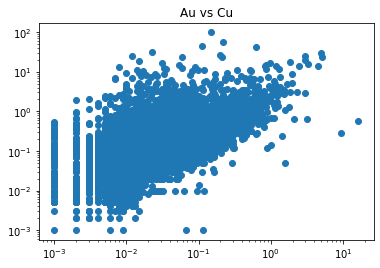

In [109]:
fig, ax = plt.subplots()

x = clean_assay.CU_PCT_OLDISKUT
ys = [clean_assay.AU_PPM_OLDISKUT]

for y in ys:
    ax.scatter(x, y)
    
    
ax.set_title("Au vs Cu")
# ax.set_xlim(0.0001, 20)
ax.set_xscale("log")
# ax.set_ylim(0.001, 100)
ax.set_yscale("log")

fig.show()

In [110]:
len(old_lith.Lith_grouped.unique())

12

In [111]:
# First, get the data
assay = pd.read_csv(f'{DATA_FOLDER}BS_assay.csv')  # here is the assay data

In [112]:
# Then clean the data
clean_assay = assay[pd.to_numeric(assay['AU_PPM_OLDISKUT'], errors='coerce').notnull()]

clean_assay.AU_PPM_OLDISKUT = clean_assay.AU_PPM_OLDISKUT.astype(float)
print(clean_assay.dtypes)
# Hopefully all the things that we want to keep numerical are now numerical

assay = clean_assay

HOLEID                object
SAMPFROM             float64
SAMPTO               float64
AG_PPM_OLDISKUT      float64
AS_PPM_OLDISKUT      float64
AU_PPM_OLDISKUT      float64
BA_PPM_OLDISKUT      float64
BI_PPM_OLDISKUT      float64
CD_PPM_OLDISKUT      float64
CO_PPM_OLDISKUT      float64
CR_PPM_OLDISKUT      float64
CU_PCT_OLDISKUT      float64
FE_PCT_OLDISKUT      float64
K_PCT_OLDISKUT       float64
MO_PCT_OLDISKUT      float64
NA_PCT_OLDISKUT      float64
PB_PCT_OLDISKUT      float64
S_PCT_OLDISKUT       float64
SB_PPM_OLDISKUT      float64
Comment               object
Veins                float64
Snip_Veins            object
Snip_veins_sorted     object
dtype: object


/var/folders/4h/m6_qv78d1ll6g0_5dn81rvh80000gp/T/ipykernel_23464/3644922165.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_assay.AU_PPM_OLDISKUT = clean_assay.AU_PPM_OLDISKUT.astype(float)


In [123]:
class Metal:
    def __init__(self, metal_id: str, weights: list, grades: list):
        data = {
            "weight": weights,
            "grade": grades
        }
        self.info = df = pd.DataFrame(data)
        df.sort_values(by='grade', ascending=False, inplace=True)
        df.reset_index(drop=True,inplace=True)
        df['cml_weight'] = df['weight'].cumsum()
        
        sum_weights = sum(df['weight'])
        df['weight_pct'] = np.divide(df['weight'], sum_weights)
        df['cml_weight_pct'] = df['weight_pct'].cumsum()
        df['yield'] = np.multiply(df['weight'], df['grade'])
        df['cml_yield'] = df['yield'].cumsum()
        df['cml_grade'] = np.divide(df['cml_yield'], df['cml_weight'])
        
        sum_yield = sum(df['yield'])
        df['recovery'] = np.divide(df['yield'], sum_yield)
        df['cml_recovery'] = df['recovery'].cumsum()
        
        
        ## Check if the DH calculations are correct
        al = df['cml_grade'].iloc[-1]
        mi_2 = np.power(df['weight'], 2)
        denom = np.multiply(np.power(al, 2), np.power(sum_weights, 2))
        
        ai_al_2 = np.power(np.subtract(df['grade'], al), 2)
        df['placeholder_name'] = np.divide(np.multiply(ai_al_2, mi_2), denom)
        self.dist_het = np.multiply(len(df), sum(df['placeholder_name']))
        
        # combined_grade = df['cml_grade'].iloc[-1]
        # df['ai-al'] = np.subtract(df['grade'], combined_grade)
        
        # numerator = np.multiply(np.power(df['ai-al'], 2), np.power(df['weight'], 2))
        # denominator = np.multiply(np.power(combined_grade, 2), np.power(df['cml_weight'].iloc[-1], 2))
        # self.dist_het = np.multiply(1 / len(df), sum(np.divide(numerator, denominator)))
        

class DrillHole:
    def __init__(self, hole_id):
        self.hole_id = hole_id
        self.metals = {}
        
    def calculate_metal_heterogeneity(self, metal_id: str, weights: list, grades: list):
        if len(weights) - len(grades) == 0:
            self.metals[metal_id] = Metal(metal_id, weights, grades)
        else:
            raise Exception("Weight and grade arrays must be same length")

In [124]:
# Sort the data into drillholes
hole_ids = assay.HOLEID.unique()

resources = {
    "Cu": "CU_PCT_OLDISKUT",
    "Au": "AU_PPM_OLDISKUT",
    "Ag": "AG_PPM_OLDISKUT",
    "Mo": "MO_PCT_OLDISKUT"
}

# currently creating a dictionary with the DataFrame queries, but we can create an object instead
drillholes = {}
for hole_id in hole_ids:
    dh = drillholes[hole_id] = DrillHole(hole_id)
    df = assay.query("HOLEID == @hole_id")
    weights = list(np.subtract(df.SAMPTO, df.SAMPFROM))
    
    for resource_id, column_id in resources.items():
        grades = df[column_id].to_list()
        dh.calculate_metal_heterogeneity(resource_id, weights, grades)

# Calculate constitutional heterogeneity, and distributional heterogeneity

In [125]:
import os

OUTPUT = "./output"

if not os.path.isdir(OUTPUT):
    os.mkdir(OUTPUT)

for resource_id in resources.keys():
    if not os.path.isdir(f"{OUTPUT}/{resource_id}"):
        os.mkdir(f"{OUTPUT}/{resource_id}")
    for dh_id, dh in drillholes.items():
        dh.metals[resource_id].info.to_csv(f"{OUTPUT}/{resource_id}/{dh_id}.csv")

In [126]:
drillholes["1198"].metals["Cu"].dist_het

0.19140545769640366

/var/folders/4h/m6_qv78d1ll6g0_5dn81rvh80000gp/T/ipykernel_23464/2523360340.py:65: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


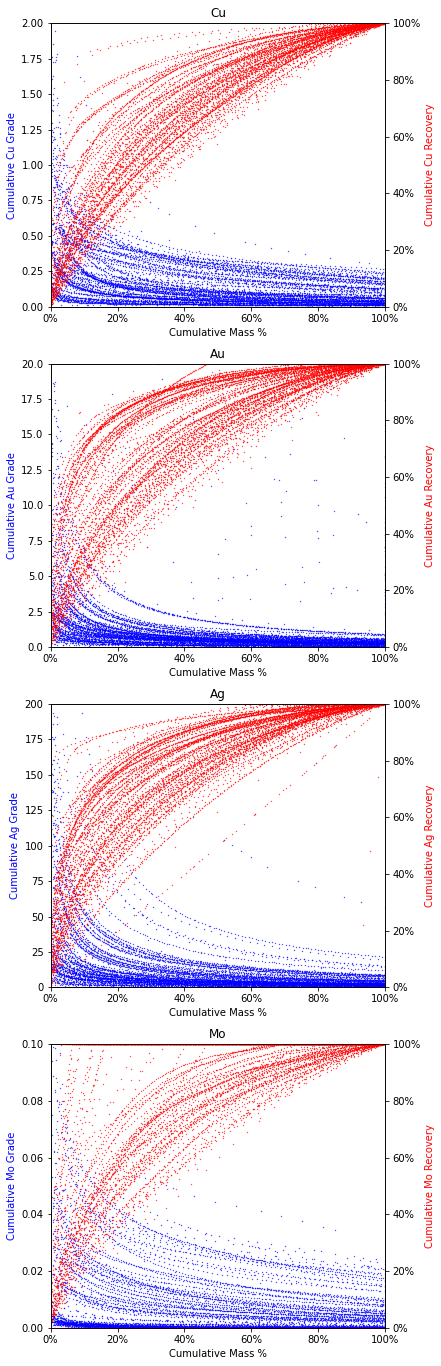

In [127]:
import matplotlib.ticker as mtick

blacklist = [
    # 'SK11-20'
]

fig, axs = plt.subplots(len(resources), figsize=(6, 6 * len(resources)))

for i, resource_id in enumerate(resources.keys()):
    ax = axs[i]
    ax_sec = ax.twinx()
    
    ax.set_title(resource_id)
    
    for dh_id in drillholes.keys():
        if dh_id not in blacklist:
            df = drillholes[dh_id].metals[resource_id].info

            x = df['cml_weight_pct']
            y = df['cml_grade']
            ax.scatter(x, y, color='blue', s=0.1)
            
            y = df['cml_recovery']
            ax_sec.scatter(x, y, color='red', s=0.1)
    
    
    ax.set_ylabel(f"Cumulative {resource_id} Grade", c="blue") 
    if resource_id == "Cu":
        ax.set_ylim(0, 2)
        pass
    elif resource_id == "Au":
        ax.set_ylim(0, 20)
    elif resource_id == "Ag":
        ax.set_ylim(0, 200)
    elif resource_id == "Mo":
        ax.set_ylim(0, 0.1)
        
    ax.set_xlabel("Cumulative Mass %")
    ax.set_xlim(0, 1)
    ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    
    ax_sec.set_ylabel(f"Cumulative {resource_id} Recovery", c="red") 
    ax_sec.set_ylim(0, 1)
    ax_sec.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

# fig, axs = plt.subplots(6, 6 * len(resources))


# x = clean_assay.AU_PPM_OLDISKUT
# y = [clean_assay.AU_PPM_OLDISKUT]

# for y in ys:
#     ax.scatter(x, y)
    
    


    
# ax.set_title("Ag vs Au")
# ax.set_xlim(0.0001, 1000)
# ax.set_xscale("log")
# ax.set_ylim(0.001, 10000)
# ax.set_yscale("log")

fig.show()

In [128]:
fig.savefig("charts.png")

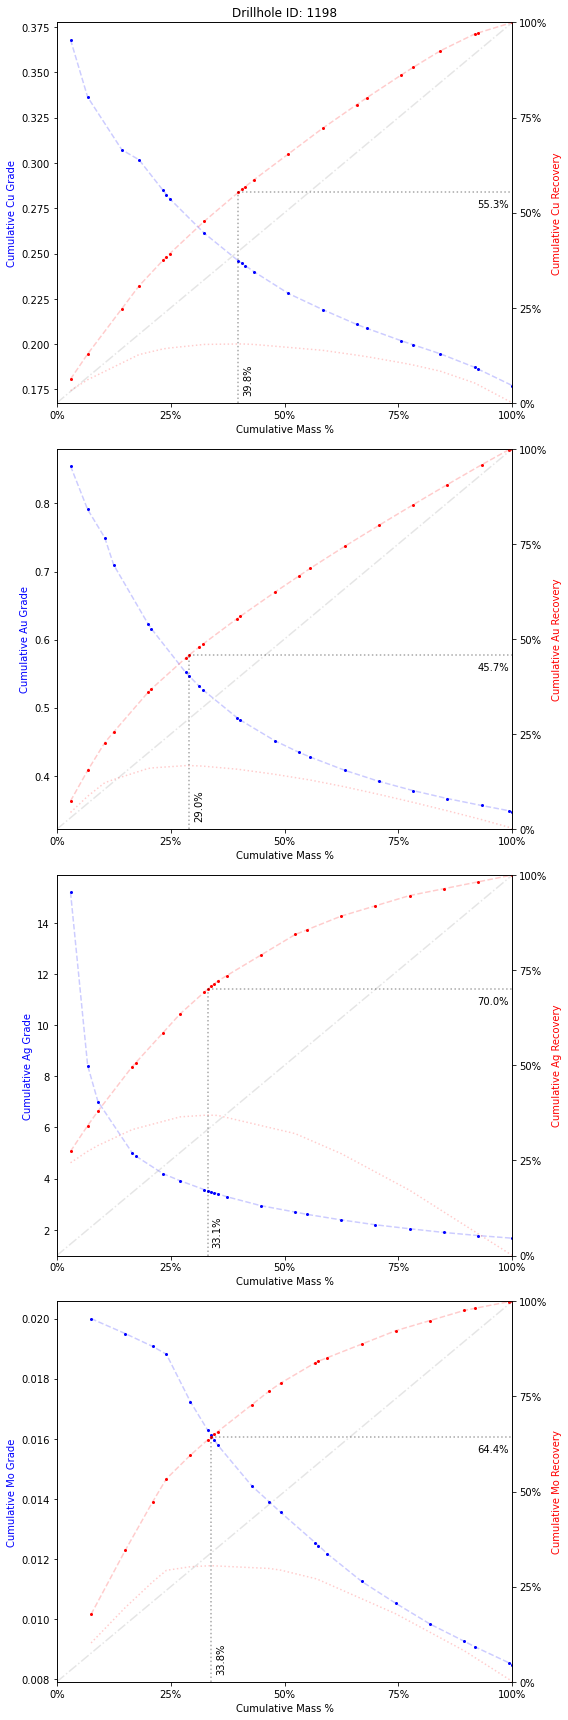

In [159]:
dh_id = '1198'
s = 4
resource_id = "Cu"

fig, axs = plt.subplots(len(resources), figsize=(8, (6 * len(resources))))
axs[0].set_title(f'Drillhole ID: {dh_id}')

for i, resource_id in enumerate(resources.keys()):
    ax = axs[i]
    ax_sec = ax.twinx()

    df = drillholes[dh_id].metals[resource_id].info


    x = df['cml_weight_pct']
    ax.set_xlabel("Cumulative Mass %")
    ax.set_xlim(0, 1)
    ax.set_xticks([0, 0.25, 0.5, 0.75, 1])
    ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))

    y = df['cml_grade']
    ax.set_ylabel(f"Cumulative {resource_id} Grade", c="blue") 

    ax.plot(x, y, color='blue', alpha=0.2, ls='--')
    ax.scatter(x, y, color='blue', s=s)


    y = df['cml_recovery']
    ax_sec.set_ylabel(f"Cumulative {resource_id} Recovery", c="red") 
    ax_sec.set_ylim(0, 1)
    ax_sec.set_yticks([0, 0.25, 0.5, 0.75, 1])
    ax_sec.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

    ax_sec.plot([0, 1], [0, 1], color='grey', alpha=0.2, ls='-.')

    ax_sec.plot(x, y, color='red', alpha=0.2, ls='--')
    ax_sec.scatter(x, y, color='red', s=s)

    y_prime = np.subtract(y, x)
    ax_sec.plot(x, y_prime, color='red', alpha=0.2, ls=':')

    x_max, y_max = x[np.argmax(y_prime)], y[np.argmax(y_prime)]
    ax_sec.plot([x_max, x_max], [0, y_max], c="black", ls=':', alpha=0.35)
    ax_sec.annotate(f"{x_max * 100:.3}%", (x_max, 0), xytext=(5, 10), textcoords='offset points', rotation=90)
    ax_sec.plot([x_max, 1], [y_max, y_max], c="black", ls=':', alpha=0.35)
    ax_sec.annotate(f"{y_max * 100:.3}%", (1, y_max), xytext=(-35, -15), textcoords='offset points')

fig.tight_layout()
fig.savefig('sample.svg')

In [21]:
collar_dhs = collar.HOLEID.unique()

len(collar_dhs)
for dh_id in hole_ids:
    if dh_id not in collar_dhs:
        print(dh_id)

UG17-001
UG17-002
UG17-003
UG17-006
UG17-007
UG17-008
UG17-009
UG17-004
UG17-005
UG17-010
UG17-011
UG17-012
UG17-013
UG17-014
UG17-015
UG17-016
UG17-017


/var/folders/4h/m6_qv78d1ll6g0_5dn81rvh80000gp/T/ipykernel_23464/3165672704.py:29: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


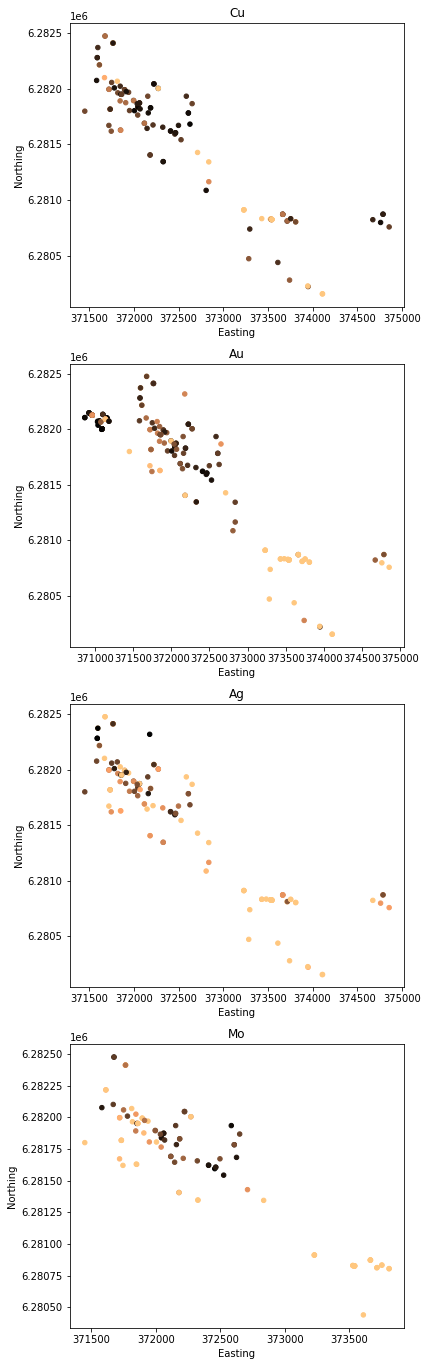

In [33]:
# fig, ax = plt.subplots()
fig, axs = plt.subplots(len(resources), figsize=(6, 6 * len(resources)))
# cmaps = {
#     'Cu': 'copper',
#     'Au': 'autumn',
#     'Ag': 'winter',
#     'Mo': 'spring'
# }

for i, resource_id in enumerate(resources.keys()):
    ax = axs[i]
    
    data = []
    for index, row in collar.iterrows():
        hole_id = row['HOLEID']
        if hole_id in hole_ids:
            # print(drillholes[hole_id].metals["Cu"].dist_het)
            data.append([row['EAST'], row['NORTH'], drillholes[hole_id].metals[resource_id].dist_het])
            
    df = pd.DataFrame(data, columns=['x', 'y', 'dist_het'])
    df = df.dropna(axis=0)
    df['capped_dist_het'] = np.minimum(df.dist_het, 2)
    ax.scatter(df.x, df.y, s=20, c=df.capped_dist_het, cmap='copper') 
    
    ax.set_title(resource_id)
    ax.set_xlabel("Easting")
    ax.set_ylabel("Northing")
    
fig.show()